In [1]:
from workingTools import cropRecognition
import matplotlib.pyplot as plt

### Create crop object

In [2]:
crop = cropRecognition()

### Define raster and sample plants

In [5]:
crop.defineRaster('../odm_orthophoto/agaveCrop.tif')

CRS of Raster Data: EPSG:4326
Number of Raster Bands: 3
Interpretation of Raster Bands: (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>)


In [6]:
crop.definePoints('../Shp/agavePoints_3p.shp')

CRS of Point Data: epsg:4326


### Retrieve information about the raster and plants

In [7]:
# get raster crs
crop.cropRaster.crs

CRS.from_epsg(4326)

In [8]:
# get point coordinates
crop.pointCoords

[(-104.60251209450945, 21.488914700478507),
 (-104.6026805707282, 21.488557889609346),
 (-104.60290182768277, 21.488567022907)]

### Define parameter for the match template and raster band

In [9]:
# ratio of analysis
crop.pointRatio = 40
# raster band for the match template analysis
crop.selectedBand = crop.blueBand
# sample row, col and array for each point
crop.getPointRowCol()

Point N°:0 corresponds to row, col: 161, 6842
Point N°:1 corresponds to row, col: 3162, 5517
Point N°:2 corresponds to row, col: 3085, 3776


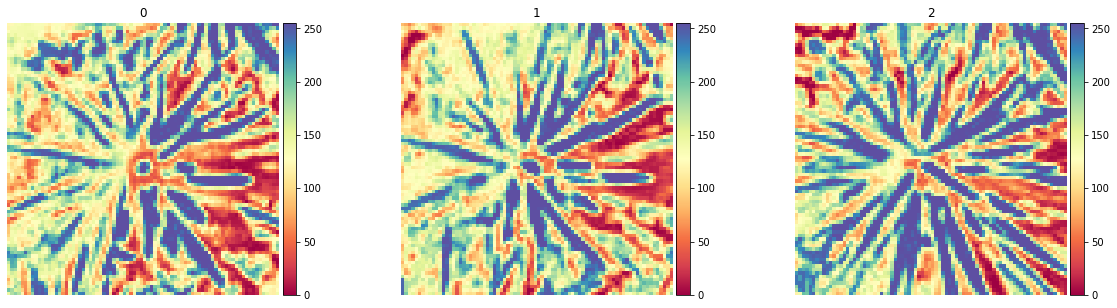

In [10]:
# plant arrays
crop.plotReferenceImages()

### Perform single match template

In [11]:
# define object order and output raster path
matchTemplate2 = crop.singleMatchTemplate(2,'../Rst/matchTemplate2.tif')

In [ ]:
# plot match template
#plt.imshow(matchTemplate0)

### Match template analysis for all points

In [12]:
# define method (quantile or threshold) and value
crop.pointsMatchTemplate('threshold',0.32)

Processing image Nº 0
Processing image Nº 1
Processing image Nº 2


In [13]:
# plot all templates 
#crop.plotAllTemplates()

# save match template to a shapefile
crop.saveMatchShp('../Shp/matchCrop.shp')

### Cluster analysis

In [14]:
# Birch clustering
crop.birchFilter()

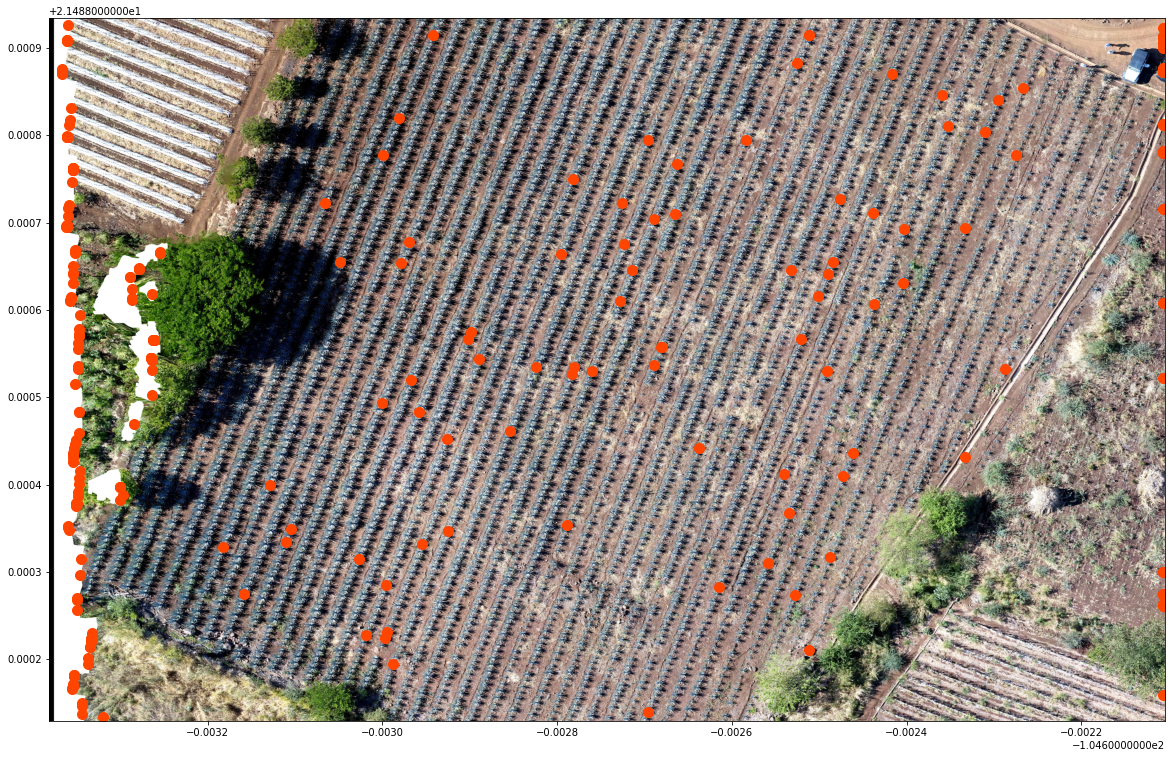

In [15]:
# plot birch points
crop.plotBirchPoints()

In [16]:
# save cluster points as shapefile
crop.saveBirchShp('../Shp/birchCrop.shp')